In [31]:
# Calling libraries:
from __future__ import division
%matplotlib inline
import numpy as np,  matplotlib.pyplot as plt, sys, scipy, gc
from time import time
from pylab import plot, show, legend
sys.path.append('/home/postdoc/dsen/Desktop/alphaSMC')
from PF import *
from tqdm import trange

In [75]:
N = 2000
d = 100
alpha = d_regular_graph(N,d)

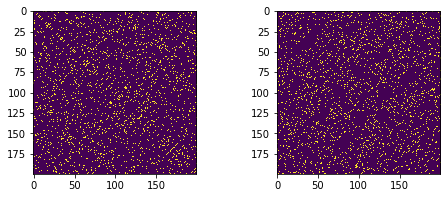

In [47]:
alpha_perm = random_permute_alpha_matrix(alpha) 
plt.rcParams['figure.figsize'] = (8, 3.0)
plt.subplot(121)
plt.imshow(alpha.todense())
plt.subplot(122)
plt.imshow(alpha_perm.todense())

In [48]:
rep = 2*10**4
alpha_perm_list = np.zeros((rep,N,N))
for r in trange(rep) :
    alpha_perm_list[r] = random_permute_alpha_matrix(alpha).todense()

100%|██████████| 20000/20000 [00:49<00:00, 400.79it/s]


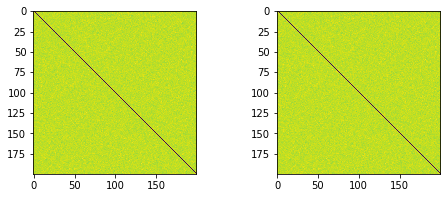

In [49]:
exp = np.mean(alpha_perm_list, axis=0)
exp2 = np.mean(alpha_perm_list**2, axis=0)
alpha_perm = random_permute_alpha_matrix(alpha) 
plt.rcParams['figure.figsize'] = (8, 3.0)
plt.subplot(121)
plt.imshow(exp)
plt.subplot(122)
plt.imshow(exp2);

In [63]:
sum(exp[0])

0.9999999999999941

In [68]:
np.mean(np.abs(np.sum(exp2,0)/(1/d)-np.ones(N)))

2.9276026047853065e-14

In [52]:
sum(np.abs(np.sum(exp,1)-np.ones(N))), sum(np.abs(np.sum(exp,0)-np.ones(N)))

(1.1587397708012759e-12, 1.149302875091962e-12)

In [53]:
exp2[0,0], np.mean(np.abs(exp2[0,1:]/(1/(d*(N-1)))-np.ones(N-1)))

(0.0, 0.019184120603013215)

In [54]:
exp[0,0], np.mean(np.abs(exp[0,1:]/(1/(N-1))-np.ones(N-1)))

(0.0, 0.019184120603013784)

In [55]:
K = 100
aij = np.zeros(K)
for k in range(K) :
    i, j = npr.choice(N,2,False)
    aij[k] = np.mean(alpha_perm_list[:,i,i]*alpha_perm_list[:,i,j])

In [56]:
np.mean(aij) 

0.0

In [57]:
K = 500
aijjp = np.zeros(K)
for k in trange(K) :
    i, j, jp = npr.choice(N,3,False)
#     print(i, j, jp, np.mean(alpha_perm_list[:,i,j]*alpha_perm_list[:,i,jp]))
    aijjp[k] = np.mean(alpha_perm_list[:,i,j]*alpha_perm_list[:,i,jp])

100%|██████████| 500/500 [00:00<00:00, 2951.41it/s]


In [61]:
np.abs(1-np.mean(aijjp)/((d-1)/((N-1)*(N-2)*d)))

0.001928577142857213

In [59]:
del alpha_perm_list
gc.collect();